# Food Carbon Footprint Calculation

Global warming and climate change are big issues in the world. With all other major reasons, food is also one of them. Food produces about 8 tons of emissions per household, or about 17% of the total. Food production is responsible for one-quarter of the world’s greenhouse gas emissions.

### Objective:  Calculate the Carbon Footprint
* **Input** : The food items (name) and their quantity (in Kilogram) to be eaten by a person in a meal
* **Output** : Total carbon footprint for the meal

In [1]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

#### Data
Data on various food items and their corresponding carbon footprint values are collected from the internet.

" https://www.kaggle.com/selfvivek/environment-impact-of-food-production "

In [2]:
# Importing dataset (Reading data file)
CFP_Data = pd.read_csv("Food_Production.csv")

In [3]:
# Looking at top rows of the data
CFP_Data.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


In [4]:
# Finding columns names of the data
CFP_Data.columns

Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater withdrawals per 100g protein (liters per 100g protein)',
       'Freshwater withdrawals per kilogram (liters per kilogram)',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity-weighted water use per kilogram (liters per kilogram)',
       'Scarcity-weighted water use per 100g protein 

In [5]:
# Taking only 2 columns food product and total emmissions
cfp_food = CFP_Data.loc[:,['Food product','Total_emissions']]
# renaming the columns to short names
cfp_food.columns = ['food','cfp']
cfp_food.head(5)

,food,cfp
0,Wheat & Rye (Bread),1.4
1,Maize (Meal),1.1
2,Barley (Beer),1.1
3,Oatmeal,1.6
4,Rice,4.0


* **Here, column 'food' represents the name of food items (there are 43 unique food items in this dataset) and the column 'cfp' is having the value of greenhouse gas emissions per kg of food product (Kg CO2 - equivalents per kg product) for each food item.**

In [6]:
# Converting the food item names to lower case
cfp_food['food'] = cfp_food['food'].apply(lambda x:x.lower())

In [7]:
# Sorting the values of dataframe 'cfp_food' according to the column 'cfp'
cfp_food = cfp_food.sort_values(by='cfp')

<BarContainer object of 43 artists>

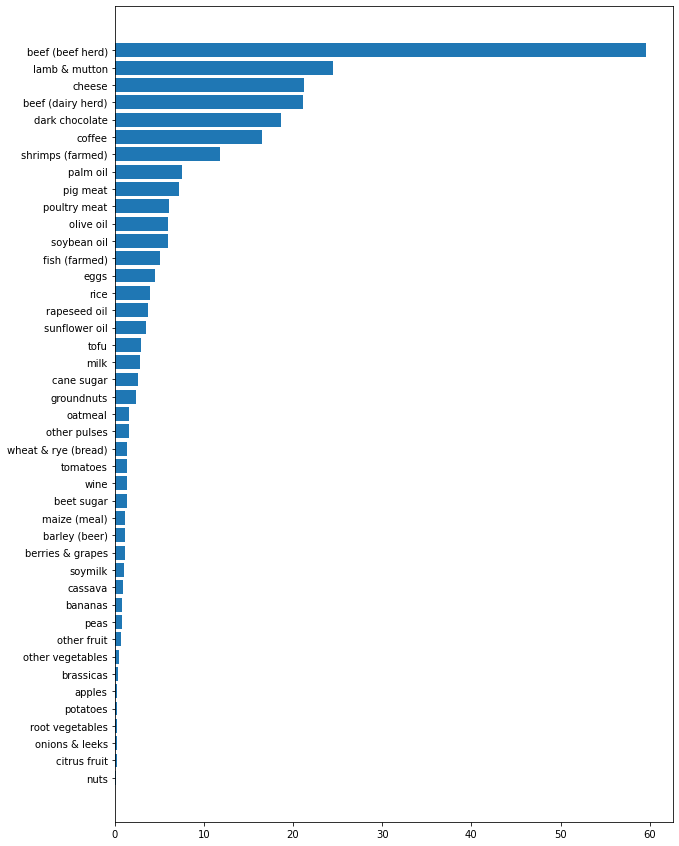

In [8]:
# Plotting on barplot to compare the cfp values for each food item
f, ax = plt.subplots(figsize=(10,15))
plt.barh(cfp_food['food'],cfp_food['cfp'])

* **Here we can see the maximum carbon footprint value is around 60 kg for the meal beef (beef herd) while lamb and mutton are following this with the second-highest value of carbon footprint. In this dataset, nuts have a minimum carbon footprint value that is even less than 1.**

In [9]:
# Looking at the list of food items
food_list = list(cfp_food['food'])
print("The available food items names are: ", food_list)

The available food items names are:  ['nuts', 'citrus fruit', 'onions & leeks', 'root vegetables', 'potatoes', 'apples', 'brassicas', 'other vegetables', 'other fruit', 'peas', 'bananas', 'cassava', 'soymilk', 'berries & grapes', 'barley (beer)', 'maize (meal)', 'beet sugar', 'wine', 'tomatoes', 'wheat & rye (bread)', 'other pulses', 'oatmeal', 'groundnuts', 'cane sugar', 'milk', 'tofu', 'sunflower oil', 'rapeseed oil', 'rice', 'eggs', 'fish (farmed)', 'soybean oil', 'olive oil', 'poultry meat', 'pig meat', 'palm oil', 'shrimps (farmed)', 'coffee', 'dark chocolate', 'beef (dairy herd)', 'cheese', 'lamb & mutton', 'beef (beef herd)']


In [10]:
# Requesting for input (name of meal)
meal_name = input("Please enter the meal name ( e.g. Breakfast/Lunch/Dinner): ")

Please enter the meal name ( e.g. Breakfast/Lunch/Dinner): Breakfast


In [11]:
# Requesting for input (quantity of meal)
item_count = int(input("Please enter the no. of food items you'll eat (e.g. 1,2,5,10...) : "))

Please enter the no. of food items you'll eat (e.g. 1,2,5,10...) : 2


In [12]:
# Enter the Name of Food Item and Quantity for each item to be eaten
# Create empty list to store the item and quantity values
items = []
# For each item take the input
i = 0
while i<item_count:
    # input is a String, Separating Item name & Quantity by comma
    (item,quantity) = input("Enter the Item name and Quantity e.g. rice,0.5: ").split(",")
    # check if item is in the food list or not, if not prompt again to enter
    if item not in food_list:
        print("Food item name not found, please enter again!")
        (item,quantity) = input("Enter the Item name and Quantity e.g. milk,0.5: ").split(",")
    # Convert the Quantity to numeric type
    num_quantity = float(quantity)
    # Add this item, num_quantity tuple to the Items list
    items = items+[(item,num_quantity)]
    # increment the i
    i = i+1

Enter the Item name and Quantity e.g. rice,0.5: milk,0.5
Enter the Item name and Quantity e.g. rice,0.5: bread,0.25
Food item name not found, please enter again!
Enter the Item name and Quantity e.g. milk,0.5: milk,0.5


In [13]:
# List of requested food items with quantity
items

[('milk', 0.5), ('milk', 0.5)]

In [14]:
# Creating Items dataframe
items_df = pd.DataFrame(items,columns=['itemname','quantity'])
items_df

,itemname,quantity
0,milk,0.5
1,milk,0.5


In [15]:
# Definign function 'cfp_calculator'
def cfp_calculator(items):
    '''A function to calculate the total carbon footprint
    Input: A list of (food item, quantity) tuples
    Output: Total carbon footprint of the list items
    '''
    # Looking for food items' carbon footprint values in cfp_food data
    # empty list to store carbon footprints from different items
    items_cfps = []
    # For each item get the cfp
    for i in items:
        # Unpack the tuple i as item and quantity
        (item,quantity) = i
        # Obtain the CFP value of food item from data
        item_cfp = cfp_food.loc[cfp_food['food']==item,:]['cfp'].values[0]
        # Multiply it with quantity
        item_cfp_q = quantity*item_cfp
        # append this to the cfp list
        items_cfps = items_cfps+[item_cfp_q]
    # Find the total Carbon foot print of the meal
    total_cfp = sum(items_cfps)
    return total_cfp

In [16]:
# Assigning total carbon footprint value to a variable
total_cfp = cfp_calculator(items)

In [17]:
# Printing resulted value
print("Total Carbon foot print of the meal is : "+str(round(total_cfp,2))+" Kgs")

Total Carbon foot print of the meal is : 2.8 Kgs


In [18]:
# Creating the DataFrame of Meal with Items count and Total CFP value
meal_dict = { 'meal_name': meal_name,
'item_count': item_count,
'item_list' : str(items),
'total_cfp' :total_cfp }
meal_df = pd.DataFrame(meal_dict,index=[0])
meal_df

,meal_name,item_count,item_list,total_cfp
0,Breakfast,2,"[('milk', 0.5), ('milk', 0.5)]",2.8


In [19]:
# Writing the meal dataframe file in excel format
meal_df.to_excel('Meal_Carbon_FootPrint.xlsx')